# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
# from mrcnn.prep_notebook import run_fcn_training_pipeline
from mrcnn.prep_notebook import build_fcn_training_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
# from mrcnn.prep_notebook import get_inference_batch, get_image_batch
input_parms = " --epochs 2 " 
input_parms +=" --steps_in_epoch 100 "    
input_parms +=" --val_steps        5 " 
input_parms +=" --last_epoch       0 "
input_parms +=" --batch_size       1 "
input_parms +=" --lr         0.0000001 "

input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            SGD "
input_parms +=" --fcn_arch       fcn32 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout        screen "
input_parms +=" --scale_factor     1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.



Arguments passed :
--------------------
batch_size                     1
coco_classes                   None
epochs                         2
fcn_arch                       FCN32
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn32_newshapes
fcn_losses                     fcn_BCE_loss
fcn_model                      init
last_epoch                     0
lr                             0.0000001
mrcnn_exclude_layers           None
mrcnn_layers                   mrcnn fpn rpn 
mrcnn_logs_dir                 train_mrcnn_newshapes
mrcnn_model                    last
new_log_folder                 True
opt                            SGD
scale_factor                   1
steps_in_epoch                 100
sysout                         SCREEN
val_steps                      5




In [2]:
# del mrcnn_model, fcn_model
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)


--> Execution started at: 12-21-2018 @ 11:34:23
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

Arguments passed :
--------------------
batch_size                     1
coco_classes                   None
epochs                         2
fcn_arch                       FCN32
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn32_newshapes
fcn_losses                     fcn_BCE_loss
fcn_model                      init
last_epoch                     0
lr                             0.0000001
mrcnn_exclude_layers           None
mrcnn_layers                   mrcnn fpn rpn 
mrcnn_logs_dir                 train_mrcnn_newshapes
mrcnn_model                    last
new_log_folder                 True
opt                            SGD
scale_factor                   1
steps_in_epoch                 100
sysout                         SCREEN
val_steps                      5



Arguments passed :
--------------------
batch_size                     1
coco_classes 


   --- FCN32 ----------------------------
   FCN fully connected 1 (fcn_fc1) shape is :  (None, 4, 4, 4096)
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
   FCN fully connected 2 (fcn_fc2) shape is :  (?, 4, 4, 4096)
***** Call to Dropout Layer : Training is :  None
***** in_train_phase() : Use_learning_phase:  True
   FCN final conv2d (fcn_classify) shape is :  (?, 4, 4, 7)  keras_tensor  True
   h_factor :  32.0 w_factor :  32.0
    FCN fcn8_classify/heatmap  (Deconv(fuse_Pool4)):  shape: (?, 128, 128, 7)      KB.shape:(None, 128, 128, 7)   Keras Tensor: True
    fcn_hm (final)                 :  shape: (?, 128, 128, 7)      KB.shape:(None, 128, 128, 7)   Keras Tensor: True

    fcn_heatmap       :  (?, 128, 128, 7)  Keras tensor  True

 
----------------------
>>> FCN Scoring Layer - mode: training
----------------------
    in_heatmap.shape               :  shape: (?, 128, 128, 7)      KB.shape:(None, 128, 128, 7)   Keras Tens

    y_pred :                       :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    loss                           :  shape: <unknown>             KB.shape:None                  Keras Tensor: False
    mean loss                      :  shape: ()                    KB.shape:()                    Keras Tensor: False
    loss (final)                   :  shape: (1, 1)                KB.shape:(1, 1)                Keras Tensor: False
    loss              : <unknown> None KerasTensor:  False
    loss mean         : () () KerasTensor:  False
    loss final        : (1, 1) (1, 1) KerasTensor:  False
 self.keras_model.losses :  0

>>> FCN build complete. mode:  training
>>> FCN initialization complete. mode:  training

 MRCNN IO Layers 
 --------------- 
 Inputs:
 -------
 index:  0    input name : input_image:0                              Type: float32           Shape: (?, 128, 128, 3)
 index:  1    input name : input_image_meta:0                       

## Defined training datasets

In [3]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 1000, generator=True)
dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  250, generator=True)
class_names = dataset_train.class_names
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

Prepares complete
Prepares complete
1000 250


####  Display active classes of `dataset`

In [ ]:
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
print(len(dataset_train.image_ids), len(dataset_val.image_ids))
print(mrcnn_model.config.BATCH_SIZE, fcn_model.config.BATCH_SIZE)

###  Print model layer and weight information

In [ ]:
fcn_model.keras_model.summary()
tr_ly = fcn_model.get_trainable_layers()
for i in tr_ly:
    print(i.name)

In [ ]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

In [ ]:
# model.keras_model.losses
# print(model.keras_model.metrics_names)
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

### Display Images from `batch_x`

image id :  340
 Image_id    :  340  Reference:  [('cloud', (172, 64, 37), (34, 23, 21, 7)), ('cloud', (135, 2, 89), (35, 32, 40, 8)), ('tree', (181, 178, 207), (82, 62, 12, 12)), ('person', (161, 164, 59), (32, 71, 2, 11)), ('car', (239, 170, 21), (34, 76, 19, 9)), ('person', (56, 159, 81), (52, 84, 2, 14)), ('person', (138, 74, 84), (107, 86, 3, 15)), ('person', (62, 155, 63), (47, 94, 3, 16)), ('tree', (43, 251, 67), (98, 100, 22, 22))] Coco Id: 340
 Image meta  :  [340 128 128   3   0   0 128 128]
 Class ids   :  (9,)    [6 6 5 1 2 1 1 1 5]
 Class Names :  ['cloud', 'cloud', 'tree', 'person', 'car', 'person', 'person', 'person', 'tree']


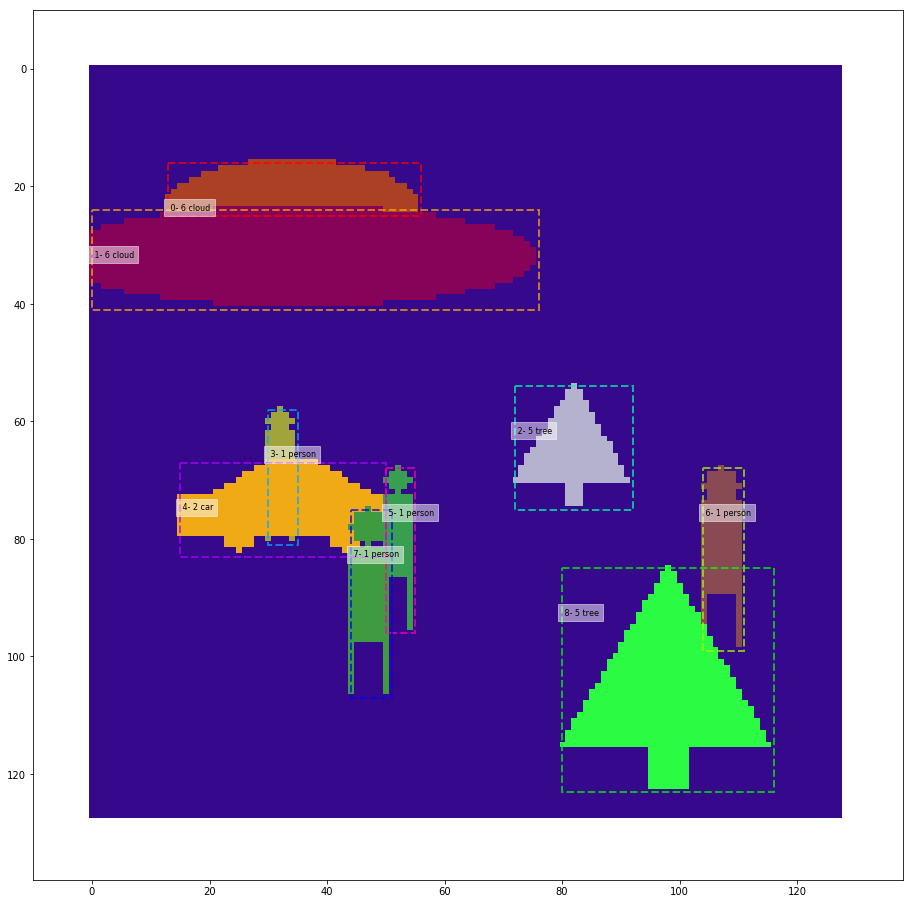

In [4]:
train_batch_x, train_batch_y = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

In [5]:
print(len(train_batch_x))
for i in train_batch_x:
    print(i.shape)

6
(1, 128, 128, 3)
(1, 15)
(1, 4092, 1)
(1, 256, 4)
(1, 100)
(1, 100, 4)


### Load a specific image using image_id

In [ ]:
from mrcnn.datagen import data_gen_simulate
train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [417])
visualize.display_training_batch(dataset_train, train_batch_x)


## Call `train_in_batches()`

In [ ]:
# mrcnn_model.config.display()
fcn_model.config.display()

In [ ]:
print(fcn_model.keras_model.optimizer)

In [6]:
# fcn_model.config.LAST_EPOCH_RAN  =  0
# fcn_model.config.EPOCHS_TO_RUN   =  100
# fcn_model.config.LEARNING_RATE   = 1.0e-6
# fcn_model.config.STEPS_PER_EPOCH = 2
# fcn_model.config.SYSOUT = 'screen'

print('    last epoch ran  : ',fcn_model.config.LAST_EPOCH_RAN)
print('    epochs to run   : ',fcn_model.config.EPOCHS_TO_RUN)
print('    steps per epoch : ',fcn_model.config.STEPS_PER_EPOCH)
print('    validation steps: ',fcn_model.config.VALIDATION_STEPS)
print('    learning rate   : ',fcn_model.config.LEARNING_RATE)
print('    momentum        : ',fcn_model.config.LEARNING_MOMENTUM)
print('    weight decay    : ',fcn_model.config.WEIGHT_DECAY)

    last epoch ran  :  0
    epochs to run   :  2
    steps per epoch :  100
    validation steps:  5
    learning rate   :  1e-07
    momentum        :  0.9
    weight decay    :  1e-08


In [7]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
##----------------------------------------------------------------------------------------------            
train_layers = ['block1+']   # args.fcn_layers
# loss_names   = ['fcn_MSE_loss']
loss_names   = ['fcn_BCE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names)


['block1+']
['(block1\\_.*)|(block2\\_.*)|(block3\\_.*)|(block4\\_.*)|(block5\\_.*)|(fcn32\\_.*)|(fcn16\\_.*)|(fcn8\\_.*)']
layers regex : (block1\_.*)|(block2\_.*)|(block3\_.*)|(block4\_.*)|(block5\_.*)|(fcn32\_.*)|(fcn16\_.*)|(fcn8\_.*)

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D          

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\keras\utils\generic_utils.py:409: RuntimeWarning: invalid value encountered in greater
  if abs(avg) > 1e-3:


 outputs:  2
(1, 1) [[nan]]
(1, 1) [[nan]]
size of outputs from train_on_batch :  2 [array([[nan]], dtype=float32), array([[nan]], dtype=float32)]
0 type:  <class 'numpy.ndarray'> shape:  (1, 1)
1 type:  <class 'numpy.ndarray'> shape:  (1, 1)
 out label:  loss  out value:  [[nan]]  shape:  (1, 1)
 out label:  fcn_BCE_loss  out value:  [[nan]]  shape:  (1, 1)
  5/100 [>.............................] - ETA: 5:33 - loss: nan - fcn_BCE_loss: nan outputs:  2
(1, 1) [[nan]]
(1, 1) [[nan]]
size of outputs from train_on_batch :  2 [array([[nan]], dtype=float32), array([[nan]], dtype=float32)]
0 type:  <class 'numpy.ndarray'> shape:  (1, 1)
1 type:  <class 'numpy.ndarray'> shape:  (1, 1)
 out label:  loss  out value:  [[nan]]  shape:  (1, 1)
 out label:  fcn_BCE_loss  out value:  [[nan]]  shape:  (1, 1)
  6/100 [>.............................] - ETA: 5:17 - loss: nan - fcn_BCE_loss: nan

KeyboardInterrupt: 

In [ ]:
pp.pprint(fcn_model.keras_model._feed_inputs)
pp.pprint(fcn_model.keras_model._feed_targets)
pp.pprint(fcn_model.keras_model._feed_loss_fns)
pp.pprint(fcn_model.keras_model._feed_outputs)
pp.pprint(fcn_model.keras_model._feed_sample_weights)
pp.pprint(fcn_model.keras_model.updates)

In [ ]:
import keras.backend as KB
fcn_hm_layer = fcn_model.keras_model.layers[32]
fcn_sp3_layer = fcn_model.keras_model.layers[30]
pp.pprint(fcn_hm_layer.__dict__    )
pp.pprint(fcn_sp3_layer.__dict__    )

In [ ]:
sess = KB.get_session()
with sess.as_default():
    wght1 = fcn_hm_layer._trainable_weights[0].eval()
    wght2 = fcn_sp3_layer._trainable_weights[0].eval()

In [ ]:
print(wght1.shape, wght2.shape)
print(wght1)